# Hypothesis testing with Python

## **Introduction**


ANOVA is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups.

Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

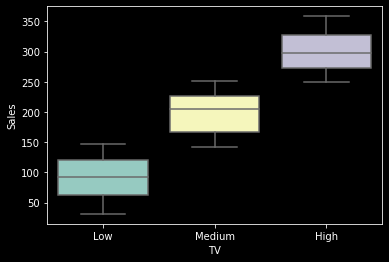

In [3]:
sns.boxplot(x = "TV", y = "Sales", data=data)

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

clearly.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

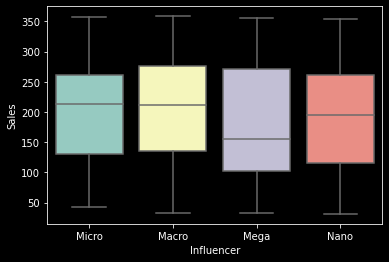

In [4]:
sns.boxplot(x = "Influencer", y = "Sales", data = data)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

Insignificant.

### Remove missing data

In [5]:
data.dropna(inplace=True)
data.isna().value_counts()

TV     Radio  Social Media  Influencer  Sales
False  False  False         False       False    569
dtype: int64

Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [6]:
formula = "Sales ~ C(TV)"
om = ols(formula, data)
model = om.fit()

summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          8.81e-256
Time:                        06:23:18   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

We are not regressing on continuous variables,this is not a necessary check.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

In [7]:
import statsmodels.api as sm

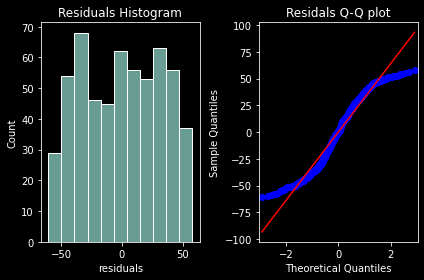

In [8]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(nrows=1, ncols=2)
# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel('residuals')
# Set the title of the residual plot.
axes[0].set_title('Residuals Histogram')
# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s', ax=axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title('Residals Q-Q plot')
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

**Question:** Is the normality assumption met?

more or less.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

<function matplotlib.pyplot.show(*args, **kw)>

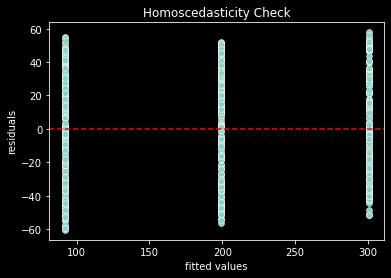

In [9]:
# Create a scatterplot with the fitted values from the model and the residuals.
sns.scatterplot(model.fittedvalues, residuals)

# Set the x-axis label.
plt.xlabel('fitted values')
# Set the y-axis label.
plt.ylabel('residuals')
# Set the title.
plt.title("Homoscedasticity Check")
# Add a line at y = 0 to visualize the variance of residuals above and below 0.
plt.axhline(y=0, color='r', linestyle='--', label='Threshold')

# Show the plot.
plt.show

**Question:** Is the constant variance (homoscedasticity) assumption met?

seems so.

First, display the OLS regression results.

In [10]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):          8.81e-256
Time:                        06:23:18   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    1

**Question:** What is your interpretation of the model's R-squared?

The model explains 87.5% of the variation in Sales

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

They are statistically significant, both low and medium TV budgets result in much lower Sales compared to a high budget. with a 95% confidence interval at the given range*

**Question:** Do you think your model could be improved? Why or why not? How?

Focus in on TV promotions, add in datapoints like location or time.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [11]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


**Question:** What is your conclusion from the one-way ANOVA test?

we can reject the null hypothesis = TV does affect Sales.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [12]:
data["TV"] = pd.Categorical(data["TV"])
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


**Question:** What is your interpretation of the Tukey HSD test?

you can reject all null hypotheses.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

[Write your response here. Double-click (or enter) to edit.]


#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)